## Importing packages and the Dataset to do some EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('data/kc_house_data.csv')
df_original = df.copy()
%store df_original

Stored 'df_original' (DataFrame)


## Viewing the Raw Data

In [2]:
df.head().iloc[:, 10:]

,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.head().iloc[:, :11]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [21]:
df['view'].value_counts()

NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


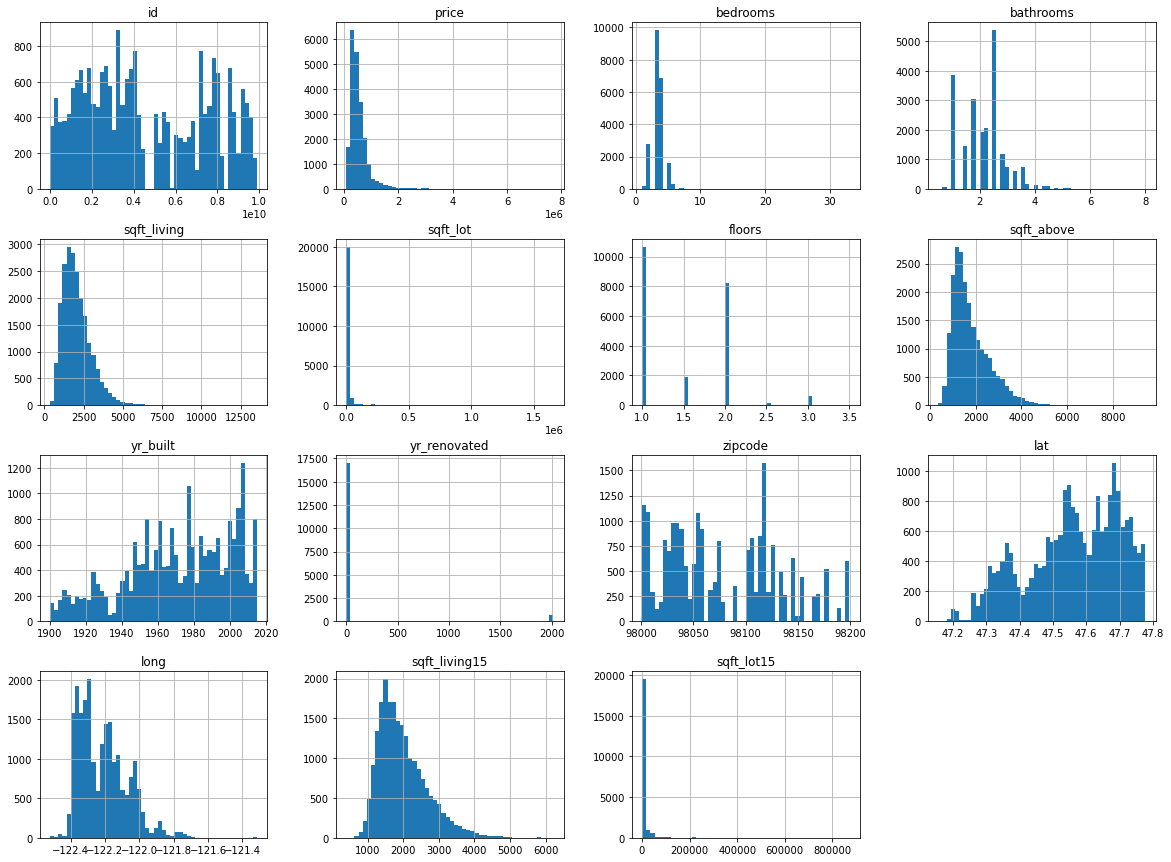

In [6]:
df.hist(bins=50, figsize=(20,15))
plt.show();

#### Initial Takeaways:
- I would like to add a datetime column for the dates, including year and month seperately.
- Waterfront and year renovated seem to be the only columns with NaN values.
- It seems that there is a lot of categorical columns: bedrooms, bathrooms, floors, waterfront, view, grade, condition. Dates and location info like yr_built, yr_renovated, lat, long, and zipcode are also non-continous values. 
- Some zero values might indicate something is non-existent, e.g. when sqft_basement or yr_renovated entry = 0.

### A look at 'Price': Descriptive Statistics
This will be our target variable

In [7]:
price = df['price']

In [8]:
len(price[price > 1000000]) 

1458

In [9]:
desc_stat_price = dict(price.describe())

In [10]:
desc_stat_price

{'count': 21597.0,
 'mean': 540296.5735055795,
 'std': 367368.1401013945,
 'min': 78000.0,
 '25%': 322000.0,
 '50%': 450000.0,
 '75%': 645000.0,
 'max': 7700000.0}

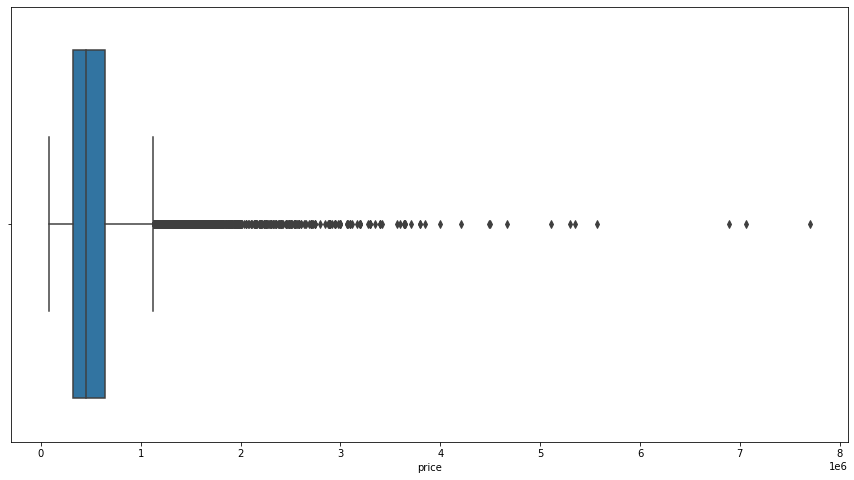

In [11]:
plt.figure(figsize = (15,8))
sns.boxplot(price);

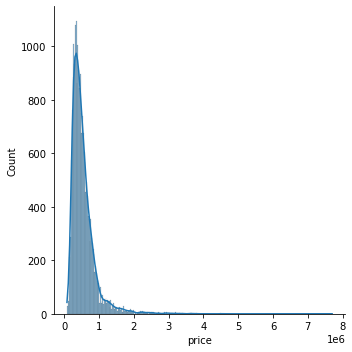

In [12]:
# plt.figure(figsize = (15,8))
sns.displot(price, kde=True);

#### Takeaways from Price:
- Seems usual that the price would be skewed to the right, many outliers of vey expensive homes.
- Not normally disributed because of that fact. Might need to manipulate before running regression.
- We can assume that this 'price' column will be our dependent vairable in regression models.

## Clean some things up...

### Find NaN and 0 values

In [13]:
# of NaN in columns
def num_NaN(dataframe):
    column_lst = dataframe.columns.values.tolist()
    for column in column_lst:
        num_of_nan = len(df[df[column].isna() == True])
        percent_nan = round(num_of_nan / len(df[column]) * 100, 2)
        if num_of_nan > 0:
            print(f'# of NaN in the {column}: {num_of_nan}, {percent_nan}%')
    return

In [14]:
# of zeros in columns
def num_zeros(dataframe):
    column_lst = dataframe.columns.values.tolist()
    for column in column_lst:
        num_of_zeros = len(df[(df[column] == 0) | (df[column] == '0') | (df[column] == '0.0')])
        percent_zeros = round(num_of_zeros / len(df[column]) * 100)
        if num_of_zeros > 0:
            print(f'# of zeros in the {column}: {num_of_zeros}, {percent_zeros}%')
    return

In [15]:
num_NaN(df)

# of NaN in the waterfront: 2376, 11.0%
# of NaN in the view: 63, 0.29%
# of NaN in the yr_renovated: 3842, 17.79%


In [16]:
num_zeros(df)

# of zeros in the sqft_basement: 12826, 59%
# of zeros in the yr_renovated: 17011, 79%


In [17]:
# # Add has_basement column
# df[df['sqft_basement'] == '?'] = 0
# df['sqft_basement'] = df['sqft_basement'].astype('float')
# df['basement'] = df['sqft_basement'].apply(lambda x: 0 if x == 0 else 1)

**ISSUES**
- It broke somehow... but besides that
- Basement needs to return binary
- Waterfront needs to return binary
- View should be label encoded

In [20]:
# Data prep and cleaning

# Change to datetime and add month column
df['date'] = pd.to_datetime(df['date'])
df['month'] = pd.DatetimeIndex(df['date']).month

# Change waterfront missing value to No
df.loc[df.waterfront.isnull(), 'waterfront'] = "NO"

# Change view missing value to None
df.loc[df.view.isnull(), 'view'] = "NONE"

# Change condition to numerical value
cond_dict = {'Poor':0, 'Fair':1, 'Average':2, 'Good':3, 'Very Good':4}
df['condition'].replace(cond_dict, inplace=True)

# Change grade to numerical value
df['grade'] = df['grade'].map(lambda x: int(x.split(' ')[0]))

# Add has_basement column
df['basement'] = df['sqft_basement'].apply(lambda x: 0 if x == 0 else 1)

# Change some yr_renovated missing value to 0 and add renovated column
df.loc[df.yr_renovated.isnull(), 'yr_renovated'] = 0
df['renovated'] = df['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)

# Add house_age column
df['age'] = df['date'].dt.year - df['yr_built']

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [ ]:
# Drop columns
df.drop(columns=['id', 'yr_renovated', 'sqft_above', 'sqft_basement',
                      'yr_built', 'yr_renovated'], inplace=True)

In [ ]:
df['basement'].value_counts()

In [22]:
# Loop through eeach column to find value counts
def df_value_counts(dataframe):
    for column in dataframe.columns:
        display(dataframe[column].value_counts())
    return

df_value_counts(df)

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

2014-06-23    142
2014-06-25    131
2014-06-26    131
2014-07-08    127
2015-04-27    126
             ... 
2014-07-27      1
2015-03-08      1
2014-11-02      1
2015-05-15      1
2015-05-24      1
Name: date, Length: 372, dtype: int64

350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

1300    138
1400    135
1440    133
1660    129
1010    129
       ... 
4970      1
2905      1
2793      1
4810      1
1975      1
Name: sqft_living, Length: 1034, dtype: int64

5000      358
6000      290
4000      251
7200      220
7500      119
         ... 
1448        1
38884       1
17313       1
35752       1
315374      1
Name: sqft_lot, Length: 9776, dtype: int64

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

NO     21451
YES      146
Name: waterfront, dtype: int64

NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

2    14020
3     5677
4     1701
1      170
0       29
Name: condition, dtype: int64

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

1300    212
1010    210
1200    206
1220    192
1140    184
       ... 
2601      1
440       1
2473      1
2441      1
1975      1
Name: sqft_above, Length: 942, dtype: int64

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2490.0        1
508.0         1
2850.0        1
2300.0        1
792.0         1
Name: sqft_basement, Length: 304, dtype: int64

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

47.6846    17
47.5322    17
47.6624    17
47.5491    17
47.6886    16
           ..
47.3104     1
47.4681     1
47.2819     1
47.6096     1
47.4300     1
Name: lat, Length: 5033, dtype: int64

-122.290    115
-122.300    111
-122.362    104
-122.291    100
-122.372     99
           ... 
-121.803      1
-121.711      1
-122.454      1
-121.835      1
-121.849      1
Name: long, Length: 751, dtype: int64

1540    197
1440    195
1560    192
1500    180
1460    169
       ... 
4890      1
2873      1
952       1
3193      1
2049      1
Name: sqft_living15, Length: 777, dtype: int64

5000      427
4000      356
6000      288
7200      210
4800      145
         ... 
11036       1
8989        1
871200      1
809         1
6147        1
Name: sqft_lot15, Length: 8682, dtype: int64

5     2414
4     2229
7     2211
6     2178
8     1939
10    1876
3     1875
9     1771
12    1470
11    1409
2     1247
1      978
Name: month, dtype: int64

1    21597
Name: basement, dtype: int64

## Review of our cleaning

In [ ]:
df.head()

In [ ]:
df.info()

## Storing clean data

In [ ]:
df_clean = df.copy()

In [ ]:
%store df_clean

In [ ]:
df_clean['basement'].value_counts()

#### What happened:
- Changed date column to date-time object
- Added a month column
- Changed zero values on 'sqft_basement' and 'yr_renovated' to NaN
- Inspeceted on NaN values in 'view' and 'waterfront'

## Correlations Explorations :)

In [ ]:
sns.pairplot(data=df_clean, corner=True);

In [ ]:
sns.pairplot(data=df_clean, vars=['price', 'bedrooms', 'bathrooms', 'floors']);


In [ ]:
sns.pairplot(data=df, vars=['price','sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15']);

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(df_clean.corr(),annot=True);

In [ ]:
abs(df_clean.corr()) > .70

In [ ]:
# def scatter_iter(dataframe, y_value):
#     for column in dataframe:
#         dataframe.plot(kind='scatter', x=column, y=y_value)
#     return 
# scatter_iter(df_clean, 'price')

## Simple Linear Regression Model

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
X = df['sqft_living']
y = df['price']
simple_model = sm.OLS(y, sm.add_constant(X)).fit()

In [ ]:
simple_model_summary = simple_model.summary()
simple_model_summary

In [ ]:
X = df['sqft_living15']
y = df['price']
simple_model = sm.OLS(y, sm.add_constant(X)).fit()

In [ ]:
simple_model_summary = simple_model.summary()
simple_model_summary

## Takeaway:
- The strongest correlations to price still have a low R-squared value with 'price' as dependent variable in simple linear regression model.
- These models don't do justice given the price variable is not normally distributed. 


## Goals for next session:
- Domain research: figure out what the variables really mean, e.g. sqft_living vs. sqft_living15
- Make adjustments to follow L.I.N.H. assumptions
- Run a multiple regression and find best way to introduce categorical variables to the model.

## Multicollinearity Search 

In [ ]:
# going to remove the dependent varibale 'price' to explore predictors. 
# Also removing 'id' and and 'date'but will keep 'month' and all other variables.
df_pred = df.iloc[:,3:]
df_pred.info()

In [ ]:
pd.plotting.scatter_matrix(df_pred, figsize=[20, 20]);
plt.show()

In [ ]:
abs(df_pred.corr()) > 0.75

In [ ]:
#     Enter a dataframee and the percentage correlation threshhold
#             Returns a DF of the high correlated pairs
def df_corr_pairs(dataframe, percentage):
    percentage = percentage / 100    
    df_corr_pairs = dataframe.corr().abs().stack().reset_index().sort_values(0, ascending=False)
    df_corr_pairs['pairs'] = list(zip(df_corr_pairs.level_0, df_corr_pairs.level_1))
    df_corr_pairs.set_index(['pairs'], inplace = True)
    df_corr_pairs.drop(columns=['level_1', 'level_0'], inplace = True)
    df_corr_pairs.columns = ['cc']
    df_corr_pairs = df_corr_pairs.drop_duplicates()
    df_high_corr_pairs = df_corr_pairs[(df_corr_pairs['cc'] > percentage) & (df_corr_pairs['cc'] < 1)]
    return df_high_corr_pairs

In [ ]:
df_corr_pairs(df_pred, 65)

In [ ]:
df_corr_pairs(df_clean, 65)

In [ ]:
df_high_corr_pairs

In [ ]:
# it seems we will need to get rid of a lot of variables here.

# Will need to choose one measure of sqft amoung the types: sqft_living, sqft_living15, sqft_above, sqft_basement

# Will have to take a closer look at bathrooms since the are not technically continous 
#     altough they follow a numeric order.

# sqft_lot and sqft_lot15 are correlated to each other but not to any of the other sqft measures, 
#     so we can likely choose one of these measure for our model.

## Try a multi regression model

In [ ]:
f = 'price ~ sqft_living + sqft_lot'
multi_model = ols(formula=f, data=df).fit()
multi_model_summ = multi_model.summary()
multi_model_summ

In [ ]:
# This barely improved the model, and actually made the condition number worse. Might need to look at something else.